In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [157]:
train=pd.read_csv("Dataset/Train.csv")
test=pd.read_csv("Dataset/Test.csv")

In [158]:
train.head(10)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,EID_2278,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,...,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
6,EID_18588,F,21.0,4,Married,Springfield,Purchasing,Directive,2.0,1,...,type2,2.0,3,-0.9612,0.7075,2.0,3,7,3,0.2819
7,EID_1235,F,NaN,3,Married,Springfield,Sales,Directive,34.0,4,...,type3,2.0,3,-0.1048,-0.4537,2.0,3,9,3,0.1169
8,EID_10197,M,40.0,4,Single,Springfield,Production,Analytical,13.0,1,...,type0,4.0,1,NaN,1.8688,2.0,5,6,3,0.1968
9,EID_21262,M,45.0,3,Married,Lebanon,IT,Directive,21.0,4,...,type3,4.0,3,0.7516,-0.4537,2.0,4,8,3,0.2870


In [159]:
train.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [160]:
test.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [161]:
tr=['Age','Time_of_service','Work_Life_balance','VAR2','VAR4','Pay_Scale']
te=['Age','Time_of_service','Pay_Scale','Work_Life_balance','VAR2','VAR4']

for i in range(len(tr)):
    train.replace(np.NaN,{tr[i]:train[tr[i]].median()},inplace=True)
    test.replace(np.NaN,{tr[i]:test[te[i]].median()},inplace=True)
    

In [162]:
train.head(10)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,EID_2278,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,...,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
6,EID_18588,F,21.0,4,Married,Springfield,Purchasing,Directive,2.0,1,...,type2,2.0,3,-0.9612,0.7075,2.0,3,7,3,0.2819
7,EID_1235,F,37.0,3,Married,Springfield,Sales,Directive,34.0,4,...,type3,2.0,3,-0.1048,-0.4537,2.0,3,9,3,0.1169
8,EID_10197,M,40.0,4,Single,Springfield,Production,Analytical,13.0,1,...,type0,4.0,1,-0.1048,1.8688,2.0,5,6,3,0.1968
9,EID_21262,M,45.0,3,Married,Lebanon,IT,Directive,21.0,4,...,type3,4.0,3,0.7516,-0.4537,2.0,4,8,3,0.2870


In [163]:
test.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

In [164]:
emp_train=train['Employee_ID']
emp_test=test['Employee_ID']

train.drop(['Employee_ID'],axis=1,inplace=True)
test.drop(["Employee_ID"],axis=1,inplace=True)

In [165]:
train=pd.get_dummies(data=train,columns=['Gender','Relationship_Status','Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits'])
test=pd.get_dummies(data=test,columns=['Gender','Relationship_Status','Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits'])

In [166]:
train.head(10)

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,...,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,...,0,0,0,1,0,0,0,1,0,0
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,...,0,1,0,0,0,0,0,1,0,0
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,...,0,0,0,1,0,0,0,1,0,0
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,...,0,0,1,0,0,0,0,1,0,0
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,...,0,0,0,1,0,0,0,0,1,0
5,54.0,3,19.0,1,21,2,5,9.0,1.0,3,...,0,0,0,1,0,0,0,1,0,0
6,21.0,4,2.0,1,50,1,1,6.0,2.0,3,...,0,0,0,0,1,0,0,1,0,0
7,37.0,3,34.0,4,23,1,4,6.0,2.0,3,...,0,0,0,0,1,0,0,0,1,0
8,40.0,4,13.0,1,49,0,1,9.0,4.0,1,...,0,1,0,0,0,1,0,0,0,0
9,45.0,3,21.0,4,34,0,2,5.0,4.0,3,...,0,0,0,0,1,0,0,0,1,0


In [167]:
train.isnull().sum()

Age                                  0
Education_Level                      0
Time_of_service                      0
Time_since_promotion                 0
growth_rate                          0
Travel_Rate                          0
Post_Level                           0
Pay_Scale                            0
Work_Life_balance                    0
VAR1                                 0
VAR2                                 0
VAR3                                 0
VAR4                                 0
VAR5                                 0
VAR6                                 0
VAR7                                 0
Attrition_rate                       0
Gender_F                             0
Gender_M                             0
Relationship_Status_Married          0
Relationship_Status_Single           0
Hometown_Clinton                     0
Hometown_Franklin                    0
Hometown_Lebanon                     0
Hometown_Springfield                 0
Hometown_Washington      

In [168]:
test.drop(['Gender_M','Relationship_Status_Single','Hometown_Washington','Unit_R&D','Decision_skill_possess_Directive','Compensation_and_Benefits_type4'],axis=1,inplace=True)

In [169]:
train.drop(['Gender_M','Relationship_Status_Single','Hometown_Washington','Unit_R&D','Decision_skill_possess_Directive','Compensation_and_Benefits_type4'],axis=1,inplace=True)

In [170]:
train.head(5)

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,...,Unit_Quality,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,...,0,0,0,0,0,1,0,0,1,0
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,...,0,0,0,1,0,0,0,0,1,0
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,...,1,0,0,0,0,1,0,0,1,0
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,...,0,0,0,0,1,0,0,0,1,0
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,...,0,0,0,0,0,1,0,0,0,1


In [171]:
train.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,...,Unit_Quality,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.468429,3.187857,13.315429,2.367143,47.064286,0.817857,2.798000,6.006286,2.387286,3.098571,...,0.027571,0.134714,0.020571,0.250714,0.248000,0.250857,0.026714,0.019000,0.563571,0.340286
std,13.214784,1.065102,10.268266,1.149395,15.761406,0.648205,1.163721,2.057112,1.122009,0.836377,...,0.163753,0.341443,0.141955,0.433455,0.431883,0.433537,0.161259,0.136534,0.495978,0.473839
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,51.000000,4.000000,20.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [232]:
#train.describe(exclude='number')   (for columns containing texts like workplace containg city names)

In [172]:
# ax = train.plot(x="Attrition_rate", y="Decision_skill_possess_Analytical", kind="bar")
# train.plot(x="Attrition_rate", y="Decision_skill_possess_Behavioral", kind="bar", ax=ax, color="C2")
# train.plot(x="Attrition_rate", y="Decision_skill_possess_Conceptual", kind="bar", ax=ax, color="C3")

# plt.show()
# #not heree coz dataset big not loading (but can be useful for multiple grpahs)

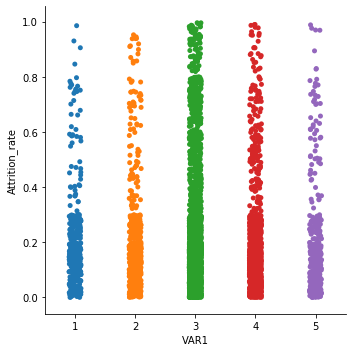

In [173]:
sns.catplot(x="VAR1",y="Attrition_rate",data=train)

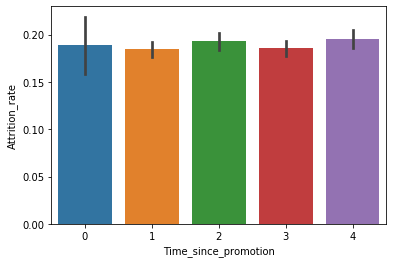

In [174]:
sns.barplot(x="Time_since_promotion",y="Attrition_rate",data=train)

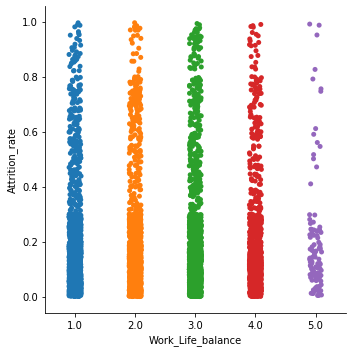

In [175]:
sns.catplot(x="Work_Life_balance",y="Attrition_rate",data=train)

In [176]:
train_x=train.drop(['Attrition_rate'],axis=1)
train_y=train['Attrition_rate']

In [177]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.20)

In [178]:
from sklearn.linear_model import LinearRegression
obj=LinearRegression()
obj.fit(X_train,y_train)
predictions=obj.predict(X_test)

In [179]:
obj.score(X_train,y_train)

0.007841487356066268

In [180]:
obj.score(X_test,y_test)

-0.0012139126211774265

In [181]:
train_x.values.flatten()
sum(n < 0 for n in train_x.values.flatten())

8130

In [182]:
train_sx=train_x.copy()
train_sy=train_y.copy()

In [183]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler(feature_range=(0,1)).fit(train_sx)
X=scaling.transform(train_sx)

In [184]:
train_Sx=pd.DataFrame(X,columns=train_x.columns)

In [185]:
train_Sx.head(10)

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,...,Unit_Quality,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3
0,0.500000,0.75,0.093023,1.00,0.240741,0.5,0.00,0.666667,0.50,0.75,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.108696,0.50,0.116279,1.00,0.296296,0.0,0.50,0.555556,0.75,0.50,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.847826,0.50,0.627907,0.75,0.574074,0.0,0.25,0.777778,0.00,0.75,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.152174,0.50,0.093023,0.75,0.666667,0.5,0.50,0.777778,0.00,0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.260870,0.00,0.116279,1.00,0.777778,0.5,0.50,0.111111,0.50,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,0.760870,0.50,0.441860,0.25,0.018519,1.0,1.00,0.888889,0.00,0.50,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,0.043478,0.75,0.046512,0.25,0.555556,0.5,0.00,0.555556,0.25,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.391304,0.50,0.790698,1.00,0.055556,0.5,0.75,0.555556,0.25,0.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.456522,0.75,0.302326,0.25,0.537037,0.0,0.00,0.888889,0.75,0.00,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.565217,0.50,0.488372,1.00,0.259259,0.0,0.25,0.444444,0.75,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [186]:
#NOT WORKING HERE!!!!!

# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import SelectKBest

# bestfeatures=SelectKBest(score_func=chi2,k=10)
# fit=bestfeatures.fit(train_Sx,train_y)

# dfscores=pd.DataFrame(fit.scores_)
# dfcols=pd.DataFrame(train_Sx.columns)

# featurescores=pd.concat([dfcols,dfscores],axis=1)
# featurescores.columns=['specs','score']

In [187]:
X_tr,X_te,y_tr,y_te=train_test_split(train_Sx,train_y,test_size=0.20)

In [188]:
from sklearn.svm import SVR 
ob=SVR()
ob.fit(X_tr,y_tr)
ob.score(X_tr,y_tr)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.008876775613405052

In [189]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(train_Sx,train_sy)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [190]:
print(model.feature_importances_)

[0.04529967 0.04566207 0.04177604 0.04247118 0.0524893  0.0280786
 0.03768168 0.04804623 0.04169276 0.04175549 0.03830979 0.03797463
 0.03103924 0.04195489 0.04129354 0.03634583 0.00081477 0.02288501
 0.01592183 0.01953512 0.02138655 0.02142096 0.01194465 0.01137704
 0.0178242  0.02001558 0.00995274 0.01778121 0.00925845 0.01444963
 0.00822414 0.0202697  0.00687486 0.02051158 0.01046011 0.02260818
 0.00637336 0.00655292 0.01642192 0.01526458]


In [191]:
feat=pd.Series(model.feature_importances_,index=train_Sx.columns)
print(feat.nlargest(25))

growth_rate                          0.052489
Pay_Scale                            0.048046
Education_Level                      0.045662
Age                                  0.045300
Time_since_promotion                 0.042471
VAR5                                 0.041955
Time_of_service                      0.041776
VAR1                                 0.041755
Work_Life_balance                    0.041693
VAR6                                 0.041294
VAR2                                 0.038310
VAR3                                 0.037975
Post_Level                           0.037682
VAR7                                 0.036346
VAR4                                 0.031039
Travel_Rate                          0.028079
Relationship_Status_Married          0.022885
Decision_skill_possess_Conceptual    0.022608
Hometown_Springfield                 0.021421
Hometown_Lebanon                     0.021387
Decision_skill_possess_Analytical    0.020512
Unit_Sales                        

In [192]:
print(feat.nlargest(25).index)

Index(['growth_rate', 'Pay_Scale', 'Education_Level', 'Age',
       'Time_since_promotion', 'VAR5', 'Time_of_service', 'VAR1',
       'Work_Life_balance', 'VAR6', 'VAR2', 'VAR3', 'Post_Level', 'VAR7',
       'VAR4', 'Travel_Rate', 'Relationship_Status_Married',
       'Decision_skill_possess_Conceptual', 'Hometown_Springfield',
       'Hometown_Lebanon', 'Decision_skill_possess_Analytical', 'Unit_Sales',
       'Unit_Logistics', 'Hometown_Franklin', 'Unit_IT'],
      dtype='object')


In [193]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

In [194]:
selected_columns =feat.nlargest(25).index
train_r = select_columns(train_Sx, selected_columns)

In [195]:
train_r.head(10)

,growth_rate,Pay_Scale,Education_Level,Age,Time_since_promotion,VAR5,Time_of_service,VAR1,Work_Life_balance,VAR6,...,Travel_Rate,Relationship_Status_Married,Decision_skill_possess_Conceptual,Hometown_Springfield,Hometown_Lebanon,Decision_skill_possess_Analytical,Unit_Sales,Unit_Logistics,Hometown_Franklin,Unit_IT
0,0.240741,0.666667,0.75,0.500000,1.00,0.75,0.093023,0.75,0.50,0.00,...,0.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.296296,0.555556,0.50,0.108696,1.00,0.50,0.116279,0.50,0.75,0.00,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.574074,0.777778,0.50,0.847826,0.75,0.50,0.627907,0.75,0.00,0.75,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.666667,0.777778,0.50,0.152174,0.75,0.50,0.093023,0.50,0.00,0.50,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.777778,0.111111,0.00,0.260870,1.00,0.25,0.116279,0.00,0.50,0.75,...,0.5,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.018519,0.888889,0.50,0.760870,0.25,0.25,0.441860,0.50,0.00,0.75,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.555556,0.555556,0.75,0.043478,0.25,0.50,0.046512,0.50,0.25,0.50,...,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.055556,0.555556,0.50,0.391304,1.00,0.50,0.790698,0.50,0.25,1.00,...,0.5,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.537037,0.888889,0.75,0.456522,0.25,1.00,0.302326,0.00,0.75,0.25,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.259259,0.444444,0.50,0.565217,1.00,0.75,0.488372,0.50,0.75,0.75,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [196]:
X_trainn,X_testt,y_trainn,y_testt=train_test_split(train_r,train_y,test_size=0.20)

model=LinearRegression()
model.fit(X_trainn,y_trainn)
predictions=model.predict(X_testt)

In [197]:
model.score(X_testt,y_testt)

-0.00442139895379845

In [198]:
np.sqrt(mean_squared_error(y_testt,predictions))

0.19440015096415103

In [199]:
from sklearn.svm import SVR 
ob=SVR()
ob.fit(X_trainn,y_trainn)
ob.score(X_testt,y_testt)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.039694367117767186

In [200]:
pr=ob.predict(X_testt)
np.sqrt(mean_squared_error(y_testt,pr))

0.1977841408053451

In [201]:
from sklearn import tree
model=tree.DecisionTreeRegressor()
model.fit(X_trainn,y_trainn)
model.score(X_trainn,y_trainn)

0.9999999629678561

In [202]:
model.score(X_testt,y_testt)

-0.9976296974368879

In [203]:
pre=model.predict(X_testt)
np.sqrt(mean_squared_error(y_testt,pre))

0.27415496306833476

In [204]:
from sklearn.ensemble import RandomForestRegressor 
regr= RandomForestRegressor(max_depth=2,random_state=0,n_estimators=100)
regr.fit(X_trainn,y_trainn)
regr.score(X_testt,y_testt)

-0.0003690585434834581

In [205]:
pr1=regr.predict(X_testt)
np.sqrt(mean_squared_error(y_testt,pr1))

0.1940076007029536

In [206]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn import metrics

In [207]:
modobj=GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=0.25)
model1=modobj.fit(X_trainn,y_trainn)
y_pred=model1.predict(X_testt)

In [208]:
model1.score(X_trainn,y_trainn)

0.004319899387807524

In [209]:
pr2=model1.predict(X_testt)
np.sqrt(mean_squared_error(y_testt,pr2))

0.19400521218687874

In [210]:
from sklearn.neural_network import MLPRegressor
clf=MLPRegressor(solver='adam',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1)

clf.fit(X_trainn,y_trainn)
clf.score(X_trainn,y_trainn)

-0.006672548036150472

In [211]:
predi=clf.predict(X_testt)
np.sqrt(mean_squared_error(y_testt,predi))

0.1949999333216217

In [212]:
import xgboost
model_xgb=xgboost.XGBRegressor()
model_xgb.fit(X_trainn,y_trainn)
model_xgb.score(X_trainn,y_trainn)
pred=model_xgb.predict(X_testt)

In [213]:
np.sqrt(mean_squared_error(y_testt,pred))

0.21057636591353535

In [214]:
model_xgb.score(X_testt,y_testt)

-0.17853372237524345

In [215]:
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

pca=PCA(n_components=10,whiten=True).fit(train_x)
x_pca=pca.transform(train_x)

print(pca.explained_variance_ratio_)


[0.48338554 0.45406612 0.02857489 0.00773591 0.00249371 0.00248604
 0.00235883 0.00229474 0.00207138 0.00178286]


In [216]:
print(sum(pca.explained_variance_ratio_))

0.9872500285363124


In [217]:
#xgboost tuning!

params = {
    'learning_rate': [0.05, 0.10, 0.20, 0.25, 0.30],
    'max_depth': [3,4,5,6,7,8,9,10,12,15],
    'min_child_weight': [1,3,5,7],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'sample_bytree': [0.3, 0.4, 0.5, 0.7]
}

In [218]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [219]:
regressor = xgboost.XGBRegressor()
random_search = RandomizedSearchCV(regressor, param_distributions=params, n_iter=6, n_jobs=5, cv=5, verbose= 3)
random_search.fit(X_trainn,y_trainn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[12:45:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:   10.9s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_con...
                                          validate_parameters=None,
                                          verbosity=None),
                   iid='warn', n_iter=6, n_jobs=5,
                   param_distributions={'gamma': [0.0, 

In [220]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, sample_bytree=0.5, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [221]:
random_search.best_params_

{'sample_bytree': 0.5,
 'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.3}

In [222]:
import xgboost
model1_xgb=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, sample_bytree=0.4, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

model1_xgb.fit(X_trainn,y_trainn)
model1_xgb.score(X_trainn,y_trainn)
pred1=model1_xgb.predict(X_testt)

[12:45:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [223]:
#bestttt!! (own)
np.sqrt(mean_squared_error(y_testt,pred1))

0.1939085248313119

In [224]:
#pankaj sir (34 th )(best methods of pankaj sir )

In [225]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# cat_features=traindf.columns[traindf.dtypes==object]
# for col in cat_features:
#     le.fit(traindf[col])
#     testdf[col]=le.transform(testdf[col])
#     traindf[col]=le.transform(traindf[col])

In [226]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [227]:
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,8],'learning_rate':[.1,.01],'n_estimators':[100,300,500],'subsample_for_bin':[3000,5000,7000],'subsample':[.6,.8],'colsample_bytree':[.6,.8,1]}
gs=GridSearchCV(LGBMRegressor(),params,scoring='neg_mean_squared_error').fit(train_r,train_sy)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [228]:
gs.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.6,
 'subsample_for_bin': 3000}

In [229]:
lgb=LGBMRegressor(max_depth=5,learning_rate=.01,n_estimators=100,subsample_for_bin=3000,subsample=.6,colsample_bytree=.6,num_leaves=20)

from sklearn.model_selection import cross_val_score
scores=cross_val_score(lgb,train_r,train_sy,cv=5)
print(scores)
print(scores.mean())



[-0.00272803 -0.00552598  0.00133392 -0.001982   -0.00353872]
-0.0024881588492435157


In [230]:
cv=KFold(n_splits=5,shuffle=True)
error=np.array([])
for trainind,testind in cv.split(train_r,train_sy):
    X_train,X_test,y_train,y_test=train_r.loc[trainind],train_r.loc[testind],train_sy[trainind],train_sy [testind]
    lgb.fit(X_train,y_train)
    y_pred=lgb.predict(X_test)
    error=np.append(error,np.sqrt(mean_squared_error(y_test,y_pred)))
error.mean()

0.18587530728379895

In [233]:
## for feature generation!!

#1
# import itertools
# cat_features=train.columns[train.dtypes==object]
# new=pd.DataFrame(index=train.index)
# for col1,col2 in itertools.combinations(cat_features,2):
#     new[col1+col2]=train[col1]+train[col2]
 
    
#2
# train['isloyal']=(train.Time_of_service>=10).astype(int)
# train['isrecentpromoted']=(train.Time_since_promotion<=2).astype(int)
# train['isloyalnotpromoted']=((train.Time_of_service>=10)&(train.Time_since_promotion>=2))
# train['istopnotpromotes']=((train.Post_Level.astype(int)>=3)&(train.Time_since_promotion>=2)).astype(int)
# train['islowernotpromotes']=((train.Post_Level.astype(int)<=3)&(train.Time_since_promotion>=2)).astype(int)
    
    
    
#https://www.kaggle.com/kagglepankaj/is-your-employee-leave-you-34th-rank